# Aprendizaje supervisado - Árboles de clasificación
![Árbol de clasificación](images/ilustracion_arb_clasi.png)

## Carga del conjunto de datos

In [1]:
# Importar modulos para el tratamiento de los datos y visualizaciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos en un dataframe de Pandas
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%203/Datasets/Movie_classificationesclas.csv'
df = pd.read_csv(url, header=0)

In [3]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Disponibilidad 3D,Tiempo realizacion,Hashtags Twitter,Genero,Promedio edad actores,Numero multiplex,Coleccion,Gana Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,SI,109.60,223.840,Terror,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedia,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,SI,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Costo de marketing        506 non-null    float64
 1   Costo de produccion       506 non-null    float64
 2   Multiplex cubiertos       506 non-null    float64
 3   Ganancias                 506 non-null    float64
 4   Duracion                  506 non-null    float64
 5   Rating actor principal    506 non-null    float64
 6   Rating actriz principal   506 non-null    float64
 7   Rating director           506 non-null    float64
 8   Rating productor          506 non-null    float64
 9   Rating criticos           506 non-null    float64
 10  Visualizaciones trailers  506 non-null    int64  
 11  Disponibilidad 3D         506 non-null    object 
 12  Tiempo realizacion        494 non-null    float64
 13  Hashtags Twitter          506 non-null    float64
 14  Genero    

### Imputación de valores faltantes

In [5]:
df['Tiempo realizacion'].mean()

157.3914979757085

In [6]:
# Imputar los valores faltantes con la media de los valores existentes
df['Tiempo realizacion'].fillna(value = df['Tiempo realizacion'].mean(), inplace = True)

In [7]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Disponibilidad 3D,Tiempo realizacion,Hashtags Twitter,Genero,Promedio edad actores,Numero multiplex,Coleccion,Gana Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,SI,109.60,223.840,Terror,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedia,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,SI,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Costo de marketing        506 non-null    float64
 1   Costo de produccion       506 non-null    float64
 2   Multiplex cubiertos       506 non-null    float64
 3   Ganancias                 506 non-null    float64
 4   Duracion                  506 non-null    float64
 5   Rating actor principal    506 non-null    float64
 6   Rating actriz principal   506 non-null    float64
 7   Rating director           506 non-null    float64
 8   Rating productor          506 non-null    float64
 9   Rating criticos           506 non-null    float64
 10  Visualizaciones trailers  506 non-null    int64  
 11  Disponibilidad 3D         506 non-null    object 
 12  Tiempo realizacion        506 non-null    float64
 13  Hashtags Twitter          506 non-null    float64
 14  Genero    

### Creación de variables dummy

In [9]:
list(dict.fromkeys(df['Genero']))

['Terror', 'Drama', 'Comedia', 'Accion']

In [10]:
# Crear variables dummy eliminando una de ellas y el atributo que la origina
df = pd.get_dummies(df, columns = ['Disponibilidad 3D', 'Genero'], drop_first = True)

In [11]:
df.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,...,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Gana Oscar,Disponibilidad 3D_SI,Genero_Comedia,Genero_Drama,Genero_Terror
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


### División en la variable predicha y el vector de características

Se va a predecir si la pelicula gana oscar.

In [13]:
X = df.loc[:, df.columns!= 'Gana Oscar']

In [14]:
X.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Disponibilidad 3D_SI,Genero_Comedia,Genero_Drama,Genero_Terror
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [15]:
X.shape

(506, 20)

In [16]:
y = df['Gana Oscar']

In [17]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Gana Oscar, dtype: int64

In [18]:
y.shape

(506,)

### Creación del conjunto de entrenamiento y validación

In [19]:
# Cargar el modulo para dividir el conjunto de datos en conjunto de entrenamiento y validación
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train.head()

,Costo de marketing,Costo de produccion,Multiplex cubiertos,Ganancias,Duracion,Rating actor principal,Rating actriz principal,Rating director,Rating productor,Rating criticos,Visualizaciones trailers,Tiempo realizacion,Hashtags Twitter,Promedio edad actores,Numero multiplex,Coleccion,Disponibilidad 3D_SI,Genero_Comedia,Genero_Drama,Genero_Terror
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [22]:
X_train.shape

(404, 20)

In [23]:
X_test.shape

(102, 20)

## Entrenamiento del árbol de clasificación

In [24]:
# Importar modulo para la creación de los árboles
from sklearn import tree

In [25]:
arbolclas = tree.DecisionTreeClassifier(max_depth = 3)

In [26]:
arbolclas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Predicción en el conjunto de entrenamiento y validación

In [27]:
y_train_pred = arbolclas.predict(X_train)
y_test_pred = arbolclas.predict(X_test)

In [28]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

### Métricas del modelo

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

In [31]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

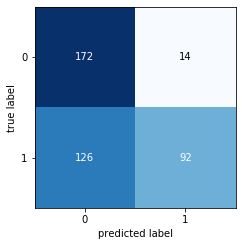

In [32]:
plot_confusion_matrix(conf_mat = confusion_matrix(y_train, y_train_pred), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 10) # ajustar el tamano

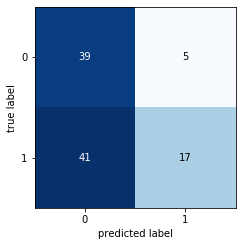

In [33]:
plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_test_pred), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 10)

In [34]:
accuracy_score(y_test, y_test_pred)
## El valor de 0.54%, indica que puede predecir el 54 % de las instancias

0.5490196078431373

In [35]:
roc_auc_score(y_test, y_test_pred)
## 0.58, el area bajo la curva (auc). 
## En aplicaciones que no involucran vidas o perdidas economicas, el valor obtenido pude ser bueno 0.58. Sin embargo si se debe predecir
## para tomar deciciones de dinero usar un 80 % o de vidas un 90%

0.5897335423197492

Gráficar árbol de regresión

In [36]:
# Utilizar el software graphviz para dar formato al árbol
datos_graf = tree.export_graphviz(arbolclas, out_file = None, feature_names = X_train.columns,
                                  filled = True, class_names = True)
## Los nombres el  la clase, bool 1 o cero

In [37]:
# Del shell interactivo Ipython importar las funciones para crear la imagen
from IPython.display import Image

In [38]:
# Importar modulo que genera la estructura del árbol y graficarlo de acuerdo a los datos
import pydotplus

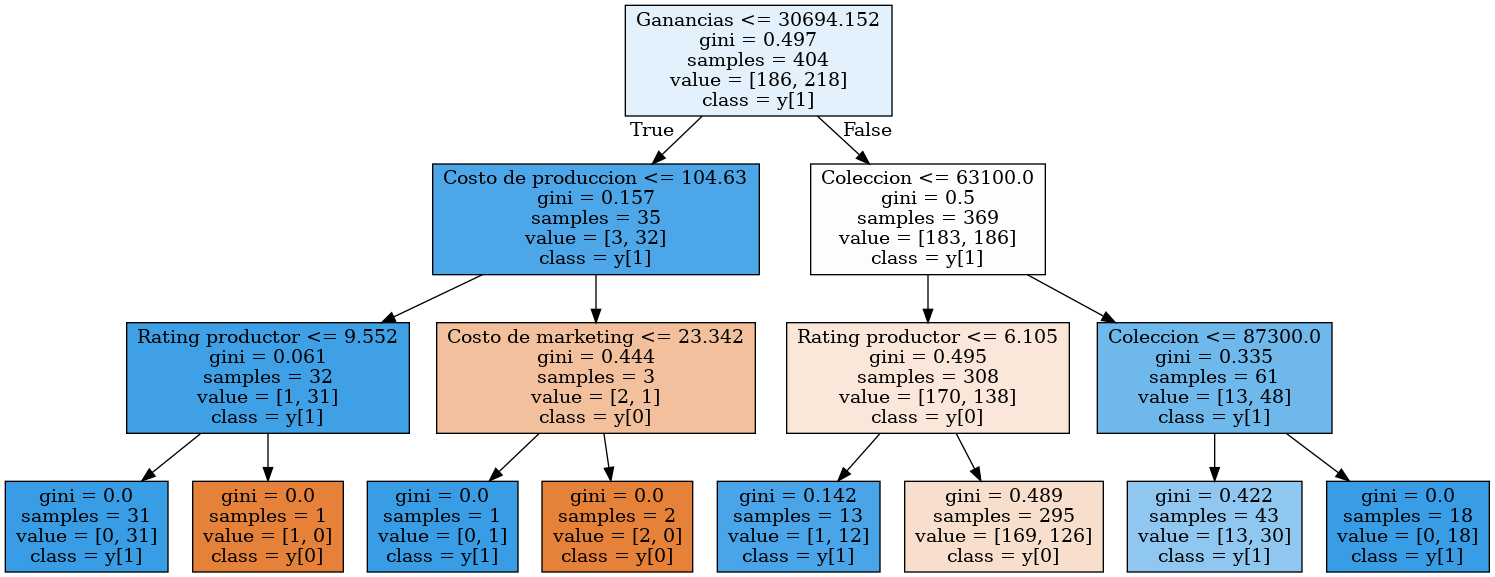

In [39]:
# Crear la imagen en formato png
graph = pydotplus.graph_from_dot_data(datos_graf)
Image(graph.create_png())
#graph.write_png('arboloriginalclass.png') # Si se desea guardar el árbol

La metrica que se utiliza en este caso es la `gini`, para hacer ramas del arbol.
`value`: las cantidades que son negativas y positivas [186, 218]
class: valor mayor de clasificar, es decir se clasifica en esta clase

# Controlando el crecimiento del árbol

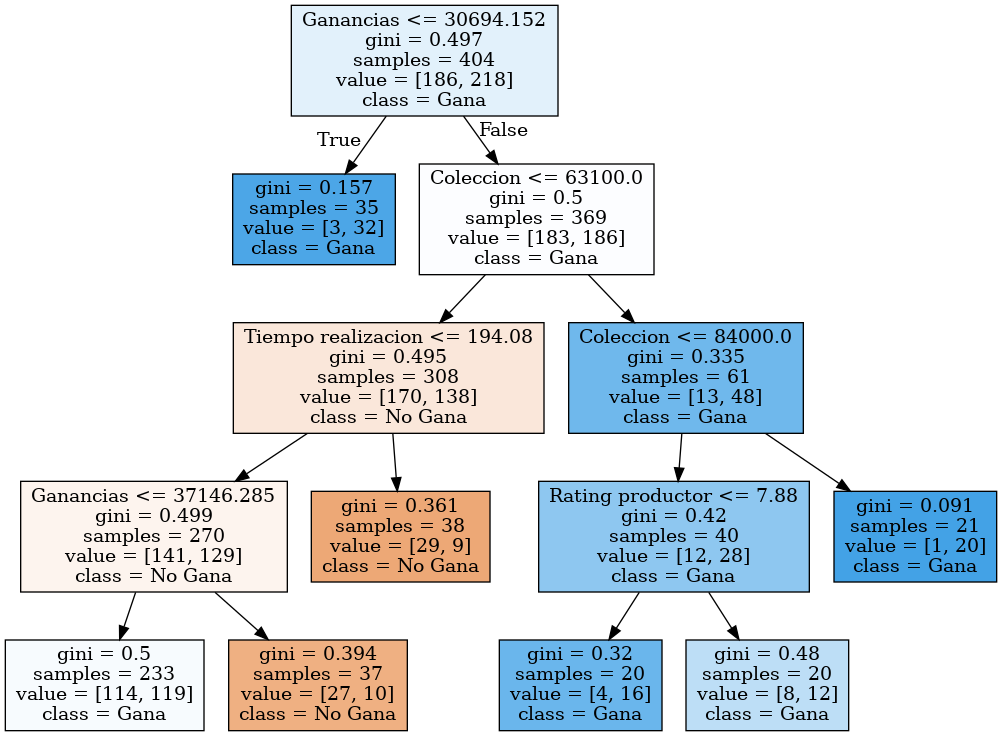

In [40]:
arbolclas1 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20, min_samples_split = 15)
arbolclas1.fit(X_train, y_train)
datos_graf = tree.export_graphviz(arbolclas1, out_file = None, feature_names = X_train.columns,
                                  filled = True, class_names = ['No Gana', 'Gana'])
graph1 = pydotplus.graph_from_dot_data(datos_graf)
Image(graph1.create_png())

# [Métodos de ensemble](https://rpubs.com/Cristina_Gil/arboles_ensemble)

Los métodos de Bagging, Random Forests y Boosting permiten obtener una mejora sustancial en el rendimiento predictivo de los modelos basados en árboles, son modelos del tipo caja negra que son difíciles de interpretar o imposibles de interpretar en cierto nivel. Se conocen estos como métodos de ensemble o métodos combinados. Son aplicables a otros métodos de aprendizaje estadísticos para labores de regresión o clasificación.

Los algoritmos ensamblados son algoritmos formados por algoritmos más simples. Estos algoritmos simples se unen para formar un algoritmo más potente.

## Baggin
El método de bagging o bootstrap aggregation es un procedimiento utilizado para reducir la varianza de un método de aprendizaje estadístico, usado muy frecuentemente con árboles de decisión.

Para árboles de regresión la aplicación del bagging consiste en crear $B$ árboles de regresión usando los $B$ sets de entrenamiento generados por bootstrapping, promediando finalmente las predicciones resultantes. Estos árboles pueden crecer bastante ya que apenas se aplican restricciones, además de que no son podados. De esta manera cada árbol individual tiene alta varianza y poco bias, pero promediando los $B$ árboles se contrarresta la varianza.

Para árboles de clasificación dada una observación de validación, podemos obtener la clase predicha por cada uno de los $B$ árboles, y escoger como predicción final para dicha observación la clase más común de entre las $B$ predicciones (predicción de cada árbol).

 
<!-- ![Formula Bagging](images/bagging.png) -->


$$
\hat{f}_{bag}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}^{ \ *b}(x)
$$

![Concepto de bootstrap](images/bootrap_concept.png)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [ ]:
# Importar modulo para Bagging
from sklearn.ensemble import BaggingClassifier

In [ ]:
clas_bag = BaggingClassifier(base_estimator = arbolclas, n_estimators = 1000, bootstrap = True, n_jobs = -1, random_state = 123)

In [ ]:
clas_bag.fit(X_train, y_train)

In [ ]:
confusion_matrix(y_test, clas_bag.predict(X_test))

In [ ]:
accuracy_score(y_test, clas_bag.predict(X_test))

### Random Forest
Todos los árboles generados por Bagging usarán un predictor muy influyente en la primera ramificación, por lo que serán similares unos a otros, y las predicciones entre ellos estarán altamente correlacionadas, por lo tanto, la aplicación de Bagging promediando valores correlacionados no consigue una reducción sustancial de la varianza con respecto a un solo árbol.

El método de Random Forests proporciona una mejora a los árboles combinados por Bagging en cuanto a que los descorrelaciona, teniendo en cuenta solo un subgrupo de predictores en cada división. Se construyen un número de árboles de decisión a partir de pseudo-muestras generadas por bootstrapping. Esta vez, se escogen de entre todos los $p$ predictores una muestra aleatoria de m predictores como candidatos antes de cada división, generalmente $m=\sqrt{p}$ (si $m=p$, bagging y random forests darían resultados equivalentes).

![RF1](images/rf1.png)

![RF2](images/rf2.png)

![RF3](images/rf3.png)

![RF4](images/rf4.png)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clas_rf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 123)

In [ ]:
clas_rf.fit(X_train, y_train)

In [ ]:
confusion_matrix(y_test, clas_rf.predict(X_test))

In [ ]:
accuracy_score(y_test, clas_rf.predict(X_test))

#### Grid Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV

In [ ]:
# Importar GridSearch para la prueba y elección de mejores estimaciones
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros = {'max_features' : [4, 5, 6, 7, 8, 9, 10], 'min_samples_split' : [2, 3, 10]}

In [ ]:
pru_param = GridSearchCV(clas_rf, parametros, n_jobs = -1, cv = 10, scoring = 'accuracy')

In [ ]:
pru_param.fit(X_train, y_train)

In [ ]:
pru_param.best_params_

In [ ]:
best_rf = pru_param.best_estimator_

In [ ]:
confusion_matrix(y_test, best_rf.predict(X_test))

In [ ]:
accuracy_score(y_test, best_rf.predict(X_test))

### Boosting
Boosting funciona de manera parecida al bagging en cuanto a que combina un gran número de árboles, a excepción de que los árboles se construyen de manera secuencial: cada árbol se genera usando información, concretamente los residuos, de árboles previamente generados, en lugar de utilizar la variable respuesta (por ello suelen ser suficientes árboles más pequeños, en lugar de un gran árbol que pueda sobreajustarse a los datos). Otra diferencia es que boosting no utiliza remuestreo por bootstrapping, sino que cada árbol se genera utilizando una versión modificada del set de datos original.

Tres de los algoritmos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting. Todos ellos se caracterizan por tener una cantidad considerable de hiperparámetros, cuyo valor óptimo se tiene que identificar mediante validación cruzada. Tres de los más importantes son:

* El número de weak learners o número de iteraciones: a diferencia del bagging y random forest, el boosting puede sufrir overfitting si este valor es excesivamente alto. Para evitarlo, se emplea un término de regularización conocido como learning rate.

* Learning rate: controla la influencia que tiene cada weak learner en el conjunto del ensemble, es decir, el ritmo al que aprende el modelo. Suelen recomendarse valores de 0.001 o 0.01, aunque la elección correcta puede variar dependiendo del problema. Cuanto menor sea su valor, más árboles se necesitan para alcanzar buenos resultados pero menor es el riesgo de overfitting.

* Si los weak learners son árboles, el tamaño máximo permitido de cada árbol. Suelen emplearse valores pequeños, entre 1 y 10.

Estos métodos de Boosting tienen a disminuir el error con la desventaja de que el modelo resultante se sobreajuste a los datos de entrenamiento, esto lo logran disminuyendo el sesgo y la varianza:

$$Error_{total}=sesgo+varianza+\epsilon$$

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradientboostingclassifier#sklearn.ensemble.GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clas_bo = GradientBoostingClassifier()
clas_bo.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, clas_bo.predict(X_test))

In [ ]:
clas_bo2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)
clas_bo2.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, clas_bo.predict(X_test))

#### Ada Boost
Adaboost (Adaptive Boosting), aplicado sobretodo a problemas de clasificación, es un algoritmo iterativo que se basa en combinar múltiples weak learners, en un único strong learner a través de una combinación lineal ponderada.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboostclassifier#sklearn.ensemble.AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clas_ab = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [ ]:
clas_ab.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, clas_ab.predict(X_test))

In [ ]:
clas_ab2 = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 500)

In [ ]:
clas_ab2.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, clas_ab2.predict(X_test))

#### XG Boost
Gradient Boosting no asigna un peso independiente a cada observación de entrenamiento, sino que hace uso de una función de coste $L(yi,f(x))$ cuyo gradiente o derivada parcial de la función de coste se pretende minimizar. Esto se lleva a cabo en un proceso iterativo. El gradiente se utiliza para encontrar la dirección en la que cambiar los parámetros de los weak learners para reducir el error de predicción en las siguientes iteraciones. Concretamente, las predicciones del weak learner m intentan acercarse al gradiente negativo de la función de coste.

![Gradiente](images/grad1.png)

https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
import xgboost as xgb

In [ ]:
clas_xgb = xgb.XGBClassifier(max_depth = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

In [ ]:
clas_xgb.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, clas_xgb.predict(X_test))

In [ ]:
xgb.plot_importance(clas_xgb)

In [ ]:
clas_xgb2 = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, n_jobs = -1, random_state = 123)

In [ ]:
parametros2 = {'max_depth': range(3, 10, 2),
               'gamma' : [0.1, 0.2, 0.3],
               'sub_sample' : [0.8, 0.9],
              'colsample_bytree' : [0.8, 0.9],
              'reg_alpha' : [1e-2, 0.1, 1]}

In [ ]:
pru_param2 = GridSearchCV(clas_xgb2, parametros2, n_jobs = -1, cv = 10, scoring = 'accuracy')

In [ ]:
pru_param2.fit(X_train, y_train)

In [ ]:
best_xgb = pru_param2.best_estimator_

In [ ]:
accuracy_score(y_test, best_xgb.predict(X_test))

In [ ]:
pru_param2.best_params_